In [4]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
import numpy as np
import matplotlib.pyplot as plt
print(numba.__version__)
%matplotlib inline

0.35.0


In [5]:
batch_size = 1000
max_epoch = 10
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

data = mnist.MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True)
#data = mnist.Fashion_MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True)

In [6]:
n_zero = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Zero.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)
n_zero.learning(
    max_epoch=max_epoch, 
    data=data, 
    batch_size=batch_size, 
    print_period=5, 
    is_numba=True, 
    verbose=False
)
data.reset_kfold()   

Multi Layer Network Model - ID: IC28IZW5
-- Learning Started --
Epoch   0 Completed - Train Error:2.30259 - Validation Error:2.30259 - Test Accuracy:0.09800 <== Minimal Val. Error
Fold:  0
Epoch   5 Completed - Train Error:2.30143 - Validation Error:2.30090 - Test Accuracy:0.11350 <== Minimal Val. Error
Epoch  10 Completed - Train Error:2.30337 - Validation Error:2.30088 - Test Accuracy:0.11350 <== Minimal Val. Error

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 10 (Fold:  0 & Epoch: 10) - Train Error:2.30337 - Validation Error:2.30088 - Test Accuracy:0.11350

Fold:  1
Epoch   5 Completed - Train Error:2.30034 - Validation Error:2.30055 - Test Accuracy:0.11350
Epoch  10 Completed - Train Error:2.30168 - Validation Error:2.30055 - Test Accuracy:0.11350

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 11 (Fold:  1 & Epoch:  1) - Train Error:2.29984 - Validation Error:2.30046 - Test Accuracy:0.11350

Fold:  2
Epoch   5 Completed - T

In [ ]:
# n_normal1 = tfn.Multi_Layer_Network(
#     input_size=input_size,
#     hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
#     output_size=output_size,
#     input_node=x,
#     target_node=target,
#     initializer=tfe.Initializer.Normal.value,
#     init_sd=1.0,
#     activator=tfe.Activator.ReLU.value,
#     optimizer=tfe.Optimizer.Adam.value,
#     learning_rate=0.001
# )
# n_normal1.learning(
#     max_epoch=max_epoch, 
#     data=data, 
#     batch_size=batch_size, 
#     print_period=5, 
#     is_numba=True, 
#     verbose=False
# )
# data.reset_kfold()

In [7]:
n_normal2 = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Normal.value,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)
n_normal2.learning(
    max_epoch=max_epoch, 
    data=data, 
    batch_size=batch_size, 
    print_period=5, 
    is_numba=True, 
    verbose=False
)
data.reset_kfold()

Multi Layer Network Model - ID: KS322WWW
-- Learning Started --
Epoch   0 Completed - Train Error:2.29853 - Validation Error:2.30136 - Test Accuracy:0.10040 <== Minimal Val. Error
Fold:  0
Epoch   5 Completed - Train Error:0.05197 - Validation Error:0.11167 - Test Accuracy:0.96510
Epoch  10 Completed - Train Error:0.01878 - Validation Error:0.09036 - Test Accuracy:0.97380 <== Minimal Val. Error

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 10 (Fold:  0 & Epoch: 10) - Train Error:0.01878 - Validation Error:0.09036 - Test Accuracy:0.97380

Fold:  1
Epoch   5 Completed - Train Error:0.00832 - Validation Error:0.05897 - Test Accuracy:0.97650
Epoch  10 Completed - Train Error:0.00667 - Validation Error:0.06530 - Test Accuracy:0.97870

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 11 (Fold:  1 & Epoch:  1) - Train Error:0.01883 - Validation Error:0.04313 - Test Accuracy:0.97320

Fold:  2
Epoch   5 Completed - Train Error:0.00567 - Va

In [8]:
n_trunc_normal = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Truncated_Normal.value,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)
n_trunc_normal.learning(
    max_epoch=max_epoch, 
    data=data, 
    batch_size=batch_size, 
    print_period=5, 
    is_numba=True, 
    verbose=False
)
data.reset_kfold()

Multi Layer Network Model - ID: HOTVCGEL
-- Learning Started --
Epoch   0 Completed - Train Error:2.30203 - Validation Error:2.30222 - Test Accuracy:0.11270 <== Minimal Val. Error
Fold:  0
Epoch   5 Completed - Train Error:0.06678 - Validation Error:0.10551 - Test Accuracy:0.96490
Epoch  10 Completed - Train Error:0.02375 - Validation Error:0.08870 - Test Accuracy:0.97490

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch:  7 (Fold:  0 & Epoch:  7) - Train Error:0.05864 - Validation Error:0.08502 - Test Accuracy:0.97420

Fold:  1
Epoch   5 Completed - Train Error:0.01591 - Validation Error:0.06542 - Test Accuracy:0.97530
Epoch  10 Completed - Train Error:0.00738 - Validation Error:0.05739 - Test Accuracy:0.97840

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 12 (Fold:  1 & Epoch:  2) - Train Error:0.03580 - Validation Error:0.05677 - Test Accuracy:0.97140

Fold:  2
Epoch   5 Completed - Train Error:0.00775 - Validation Error:0.02436 

In [9]:
n_lecun_normal = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Lecun_Normal.value,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)
n_lecun_normal.learning(
    max_epoch=max_epoch, 
    data=data, 
    batch_size=batch_size, 
    print_period=5, 
    is_numba=True, 
    verbose=False
)
data.reset_kfold()

Multi Layer Network Model - ID: S09Z2QOM
-- Learning Started --
Epoch   0 Completed - Train Error:9.91857 - Validation Error:10.07634 - Test Accuracy:0.10340 <== Minimal Val. Error
Fold:  0
Epoch   5 Completed - Train Error:0.10152 - Validation Error:0.13540 - Test Accuracy:0.95950 <== Minimal Val. Error
Epoch  10 Completed - Train Error:0.06379 - Validation Error:0.13066 - Test Accuracy:0.96220

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch:  8 (Fold:  0 & Epoch:  8) - Train Error:0.04370 - Validation Error:0.12598 - Test Accuracy:0.96440

Fold:  1
Epoch   5 Completed - Train Error:0.02433 - Validation Error:0.08019 - Test Accuracy:0.96610
Epoch  10 Completed - Train Error:0.02596 - Validation Error:0.11217 - Test Accuracy:0.96670

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 11 (Fold:  1 & Epoch:  1) - Train Error:0.03533 - Validation Error:0.06182 - Test Accuracy:0.96250

Fold:  2
Epoch   5 Completed - Train Error:0.04240 - V

In [10]:
n_lecun_uniform = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Lecun_Uniform.value,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)
n_lecun_uniform.learning(
    max_epoch=max_epoch, 
    data=data, 
    batch_size=batch_size, 
    print_period=5, 
    is_numba=True, 
    verbose=False
)
data.reset_kfold()

Multi Layer Network Model - ID: W5JE3RQG
-- Learning Started --
Epoch   0 Completed - Train Error:12.22539 - Validation Error:12.35583 - Test Accuracy:0.07940 <== Minimal Val. Error
Fold:  0
Epoch   5 Completed - Train Error:0.06995 - Validation Error:0.12972 - Test Accuracy:0.96200 <== Minimal Val. Error
Epoch  10 Completed - Train Error:0.03265 - Validation Error:0.13390 - Test Accuracy:0.96590

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch:  6 (Fold:  0 & Epoch:  6) - Train Error:0.05655 - Validation Error:0.12967 - Test Accuracy:0.96390

Fold:  1
Epoch   5 Completed - Train Error:0.03909 - Validation Error:0.08853 - Test Accuracy:0.96560
Epoch  10 Completed - Train Error:0.02991 - Validation Error:0.07949 - Test Accuracy:0.96820

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 11 (Fold:  1 & Epoch:  1) - Train Error:0.04864 - Validation Error:0.05843 - Test Accuracy:0.96410

Fold:  2
Epoch   5 Completed - Train Error:0.01510 - 

In [12]:
neural_networks = {
    "zero": n_zero,
#    "normal1": n_normal1,     
    "normal2": n_normal2, 
    "trunc_normal": n_trunc_normal,
    "lecun_normal": n_lecun_normal,
    "lecun_uniform": n_lecun_uniform
}

In [13]:
for key, neural_network in neural_networks.items():
    print("{:10s} - Epoch:{:3d}, Min Train Error:{:7.5f}, Min Validation Error:{:7.5f}, Test Accuracy:{:7.5f}".format(
        key, 
        neural_network.min_validation_error_epoch,
        neural_network.min_train_error,
        neural_network.min_validation_error,
        neural_network.test_accuracy_at_min_validation_error_epoch
    ))

print()
    
for key, neural_network in neural_networks.items():    
    print("{:10s} - Mean of Min Va. Error For All Folds:{:7.5f}".format(
        key,         
        neural_network.mean_min_validation_error_for_all_folds
    ))

zero       - Epoch: 11, Min Train Error:2.29984, Min Validation Error:2.30046, Test Accuracy:0.11350
normal2    - Epoch: 97, Min Train Error:0.00081, Min Validation Error:0.00322, Test Accuracy:0.97910
trunc_normal - Epoch:120, Min Train Error:0.00001, Min Validation Error:0.00001, Test Accuracy:0.98300
lecun_normal - Epoch: 44, Min Train Error:0.00168, Min Validation Error:0.00326, Test Accuracy:0.97370
lecun_uniform - Epoch: 96, Min Train Error:0.00070, Min Validation Error:0.00175, Test Accuracy:0.97790

zero       - Mean of Min Va. Error For All Folds:2.30050
normal2    - Mean of Min Va. Error For All Folds:0.01615
trunc_normal - Mean of Min Va. Error For All Folds:0.01582
lecun_normal - Mean of Min Va. Error For All Folds:0.02186
lecun_uniform - Mean of Min Va. Error For All Folds:0.02179


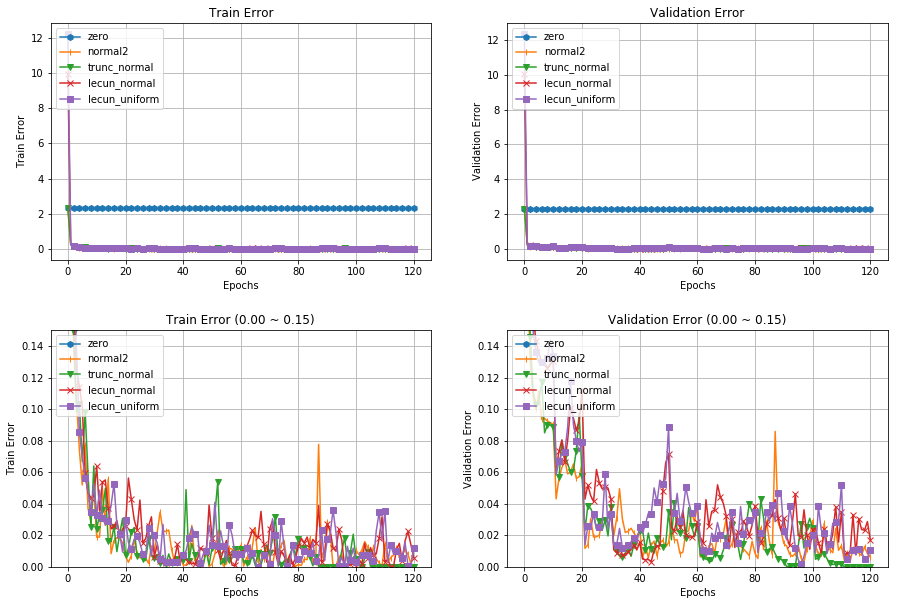

In [16]:
markers = {
    "zero": "h",
#    "normal1": "_",     
    "normal2": "|", 
    "trunc_normal": "v",
    "lecun_normal": "x",
    "lecun_uniform": "s"
}

epoch_list = np.arange(len(neural_networks["zero"].train_error_list))

f, axarr = plt.subplots(2, 2, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0, 0].plot(epoch_list, neural_network.train_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 0].set_ylabel('Train Error')
axarr[0, 0].set_xlabel('Epochs')
axarr[0, 0].grid(True)
axarr[0, 0].set_title('Train Error')
axarr[0, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0, 1].plot(epoch_list, neural_network.validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 1].set_ylabel('Validation Error')
axarr[0, 1].set_xlabel('Epochs')
axarr[0, 1].grid(True)
axarr[0, 1].set_title('Validation Error')
axarr[0, 1].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 0].plot(epoch_list, neural_network.train_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 0].set_ylabel('Train Error')
axarr[1, 0].set_xlabel('Epochs')
axarr[1, 0].grid(True)
axarr[1, 0].set_ylim(0, 0.15)
axarr[1, 0].set_title('Train Error (0.00 ~ 0.15)')
axarr[1, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 1].plot(epoch_list, neural_network.validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 1].set_ylabel('Validation Error')
axarr[1, 1].set_xlabel('Epochs')
axarr[1, 1].grid(True)
axarr[1, 1].set_ylim(0, 0.15)
axarr[1, 1].set_title('Validation Error (0.00 ~ 0.15)')
axarr[1, 1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)

plt.show()

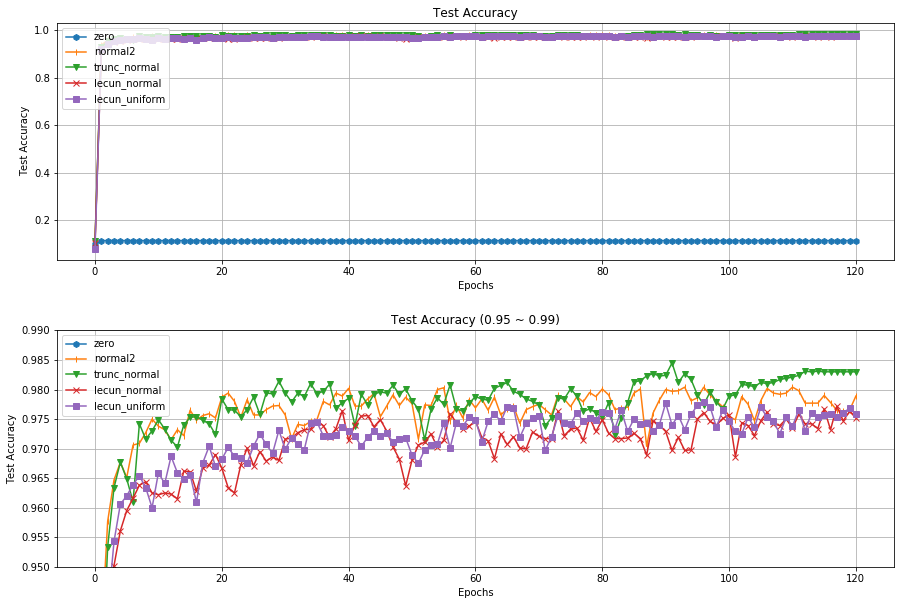

In [18]:
f, axarr = plt.subplots(2, 1, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_network.test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[0].set_ylabel('Test Accuracy')
axarr[0].set_xlabel('Epochs')
axarr[0].grid(True)
axarr[0].set_title('Test Accuracy')
axarr[0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1].plot(epoch_list, neural_network.test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[1].set_ylabel('Test Accuracy')
axarr[1].set_xlabel('Epochs')
axarr[1].grid(True)
axarr[1].set_ylim(0.95, 0.99)
axarr[1].set_title('Test Accuracy (0.95 ~ 0.99)')
axarr[1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)
plt.show()

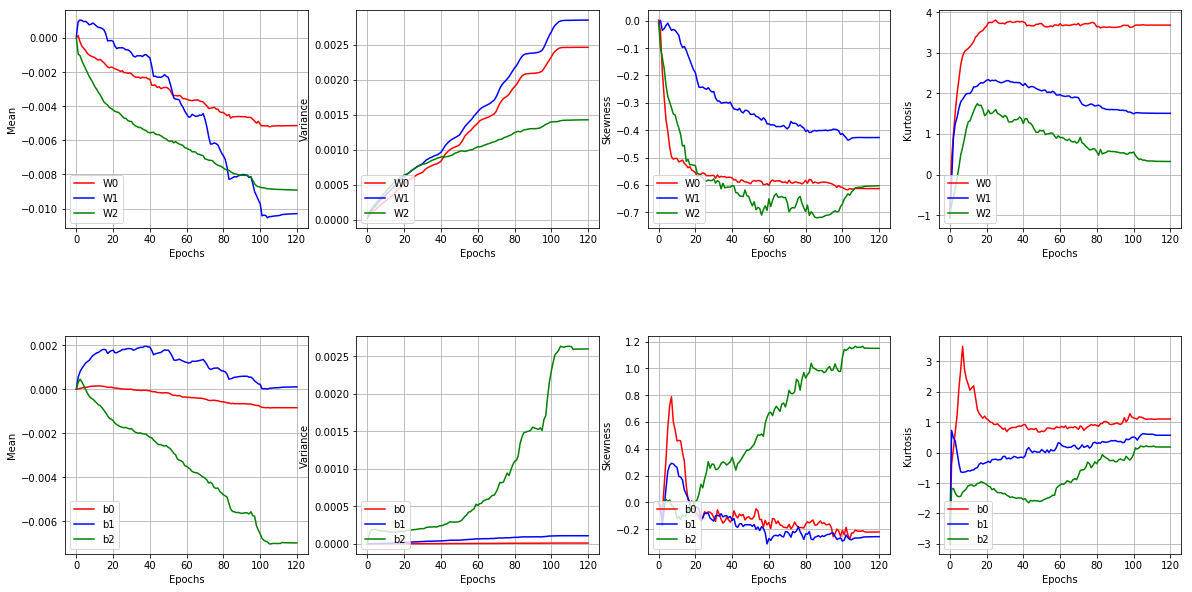

In [19]:
neural_networks["trunc_normal"].draw_param_description(figsize=(20, 10))

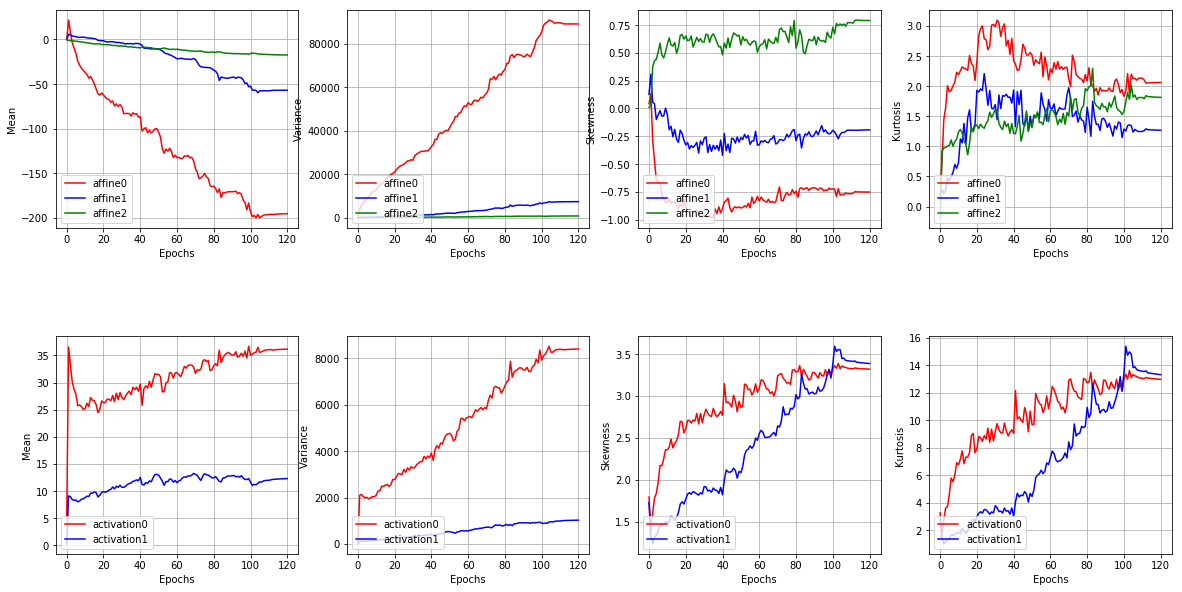

In [20]:
neural_networks["trunc_normal"].draw_output_description(figsize=(20, 10))